# Importing libraries

In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Read Data

In [2]:
df = pd.read_csv('heart_2020.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [4]:
df.shape

(319795, 18)

In [5]:
# Getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# EDA

In [6]:
# Check null values
df.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

In [7]:
# Check duplicated data
df.duplicated().any()
df.duplicated().sum()

18078

In [8]:
# Drop duplicated data
df.drop_duplicates(inplace=True)
df.shape

(301717, 18)

In [9]:
# Get overall statistics 
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [10]:
# Categorical data info
df.describe(include='O')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,274456,174312,280136,289653,257362,159671,31670,227724,251796,230412,104796,259066,289941,272425


In [11]:
# The raio of HeartDisease
df['HeartDisease'].value_counts()

HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64

Text(0.5, 1.0, 'Stroke')

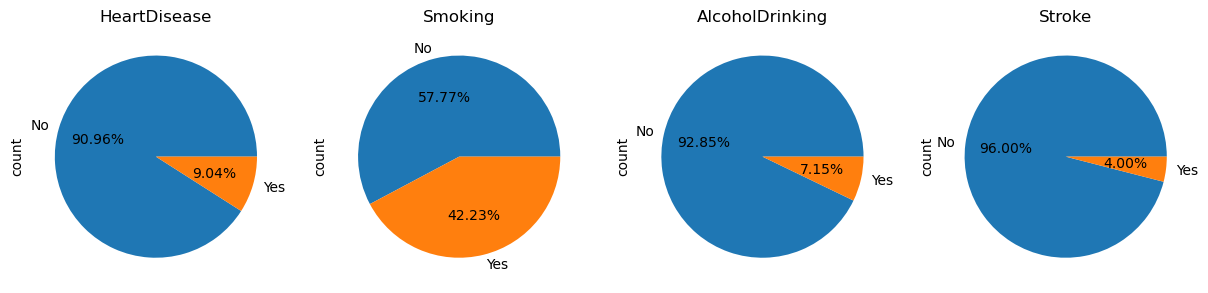

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)  
df['HeartDisease'].value_counts().plot.pie(autopct = '%0.2f%%')
plt.title('HeartDisease')

plt.subplot(1, 4, 2)  
df['Smoking'].value_counts().plot.pie(autopct = '%0.2f%%')
plt.title('Smoking')

plt.subplot(1, 4, 3)  
df['AlcoholDrinking'].value_counts().plot.pie(autopct = '%0.2f%%')
plt.title('AlcoholDrinking')

plt.subplot(1, 4, 4)  
df['Stroke'].value_counts().plot.pie(autopct = '%0.2f%%')
plt.title('Stroke')

<Axes: title={'center': 'AgeCategory with HeartDisease'}, xlabel='AgeCategory', ylabel='count'>

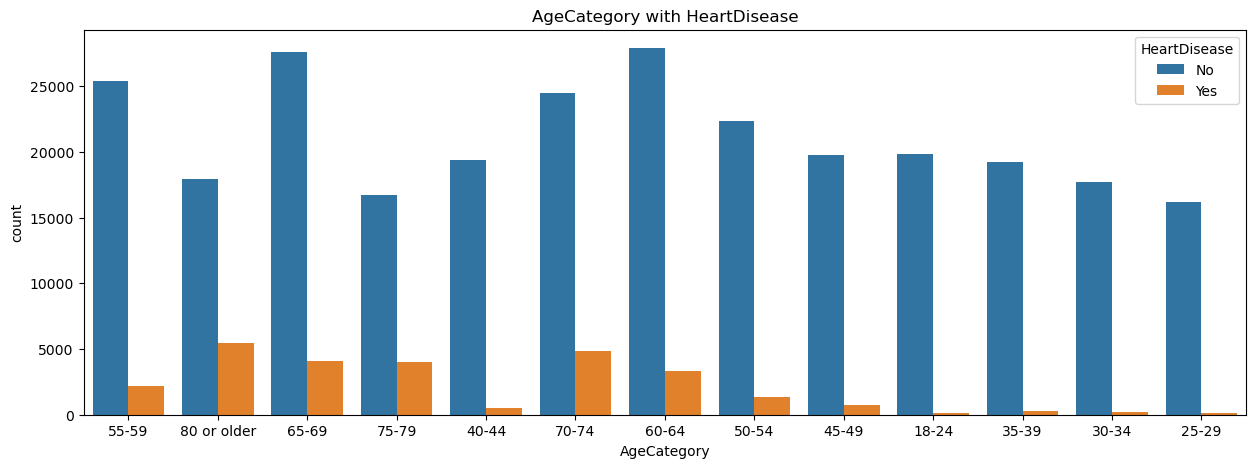

In [13]:
# The count of Heartdisease with Age
plt.figure(figsize = (15,5))
plt.title("AgeCategory with HeartDisease")
sns.countplot(x=df["AgeCategory"],hue=df["HeartDisease"])

<Axes: title={'center': 'Sex with HeartDisease'}, xlabel='Sex', ylabel='count'>

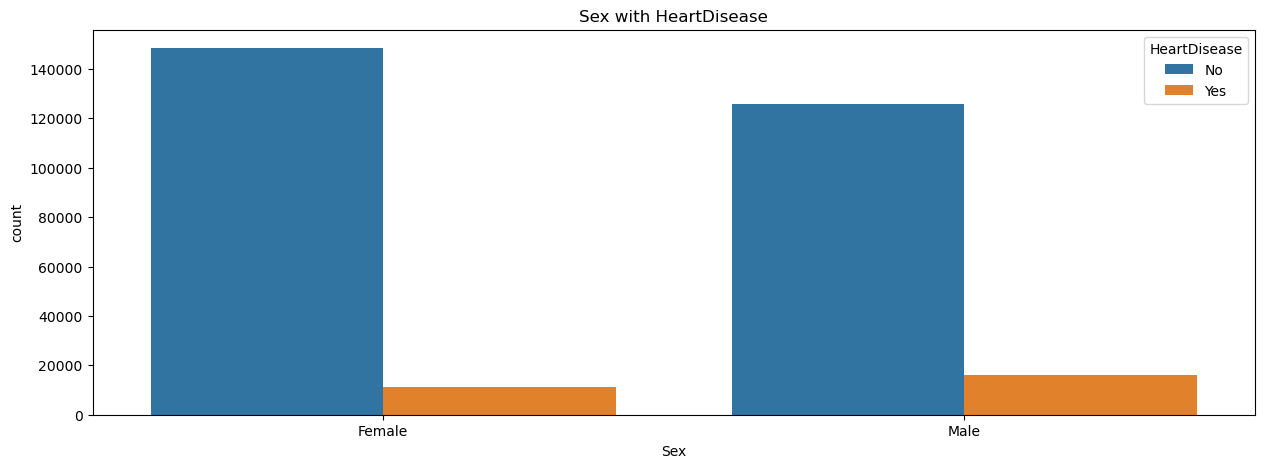

In [14]:
# The count of Heartdisease with Sex
plt.figure(figsize = (15,5))
plt.title("Sex with HeartDisease")
sns.countplot(x=df["Sex"],hue=df["HeartDisease"])

<Axes: title={'center': 'Smoking with HeartDisease'}, xlabel='Smoking', ylabel='count'>

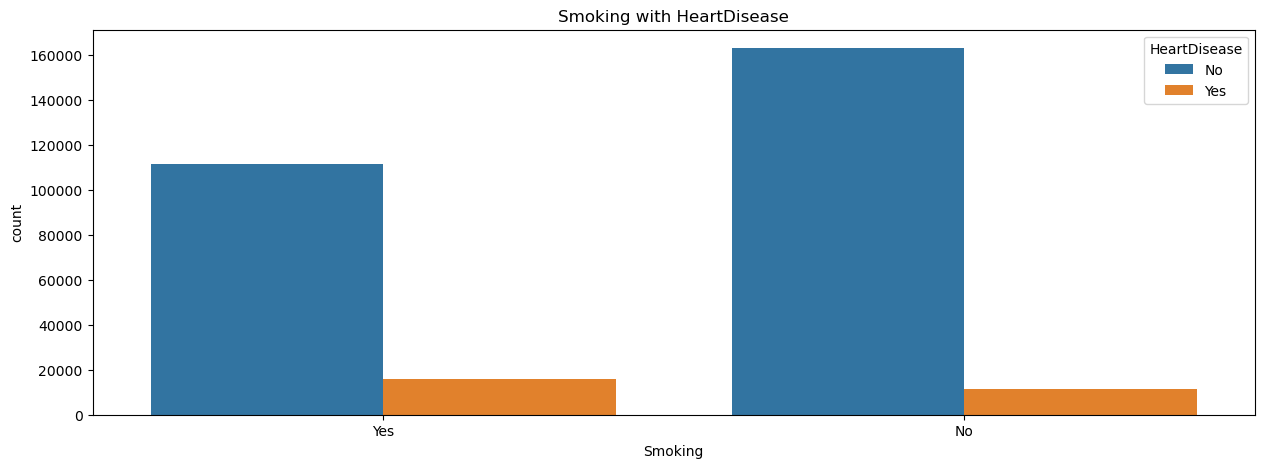

In [15]:
# The count of Heartdisease with Smoking
plt.figure(figsize = (15,5))
plt.title("Smoking with HeartDisease")
sns.countplot(x=df["Smoking"],hue=df["HeartDisease"])

<Axes: title={'center': 'Diabetic with HeartDisease'}, xlabel='Diabetic', ylabel='count'>

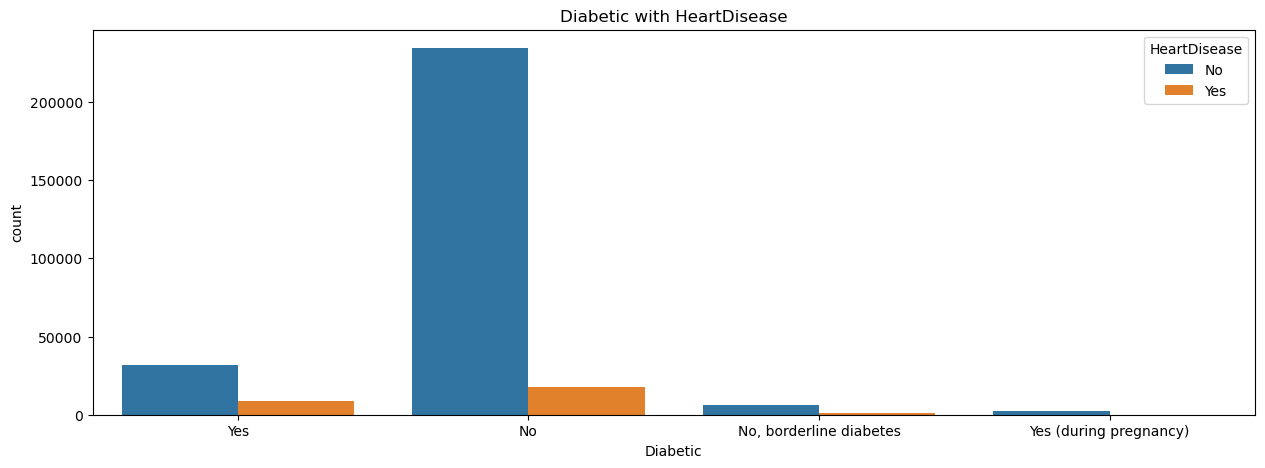

In [16]:
# The count of Heartdisease with Diabetic
plt.figure(figsize = (15,5))
plt.title("Diabetic with HeartDisease")
sns.countplot(x=df["Diabetic"],hue=df["HeartDisease"])

* Smoking affects HeartDisease 
* The risk of HeartDisease increases with age
* HeartDisease is more common in men than in women

### Outliers detention

In [17]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


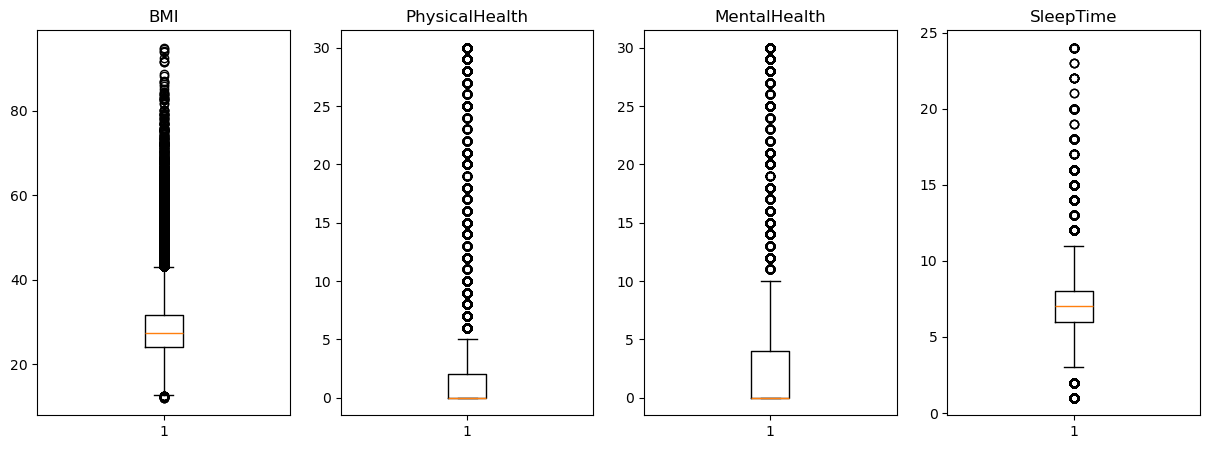

In [18]:
fig, ax = plt.subplots(1,4,figsize=(15,5))
ax[0].boxplot(df['BMI'])
ax[0].set_title("BMI")
ax[1].boxplot(df['PhysicalHealth'])
ax[1].set_title("PhysicalHealth")
ax[2].boxplot(df['MentalHealth'])
ax[2].set_title("MentalHealth")
ax[3].boxplot(df['SleepTime'])
ax[3].set_title("SleepTime")
plt.show()

In [19]:
from scipy.stats import zscore
zscore= zscore(df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']])

In [20]:
z_scores = np.abs(zscore)
no_outliers = (z_scores<3).all(axis=1)
outlier_percentage = (df.shape[0] - df[no_outliers].shape[0]) / df.shape[0]
print(f'outlier percentage : {round(outlier_percentage*100, 2)} %')

outlier percentage : 12.86 %


Percentage of outliers is large so we can not drop them,in case of having an imbalanced data, it's recommended to keep the outliers.

### Encode categorical data 

In [21]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [22]:
columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']

In [23]:
df[columns] = df[columns].apply(LabelEncoder().fit_transform)

In [24]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [25]:
race_groups = df.groupby('Race')['HeartDisease'].value_counts().unstack(fill_value=0)
race_groups['Ratio'] = race_groups[1] / race_groups[0]
print(race_groups[['Ratio']])

HeartDisease     Ratio
Race                  
0             0.116559
1             0.034425
2             0.082017
3             0.056227
4             0.088556
5             0.109069


In [26]:
df = df.drop('Race', axis=1)
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')

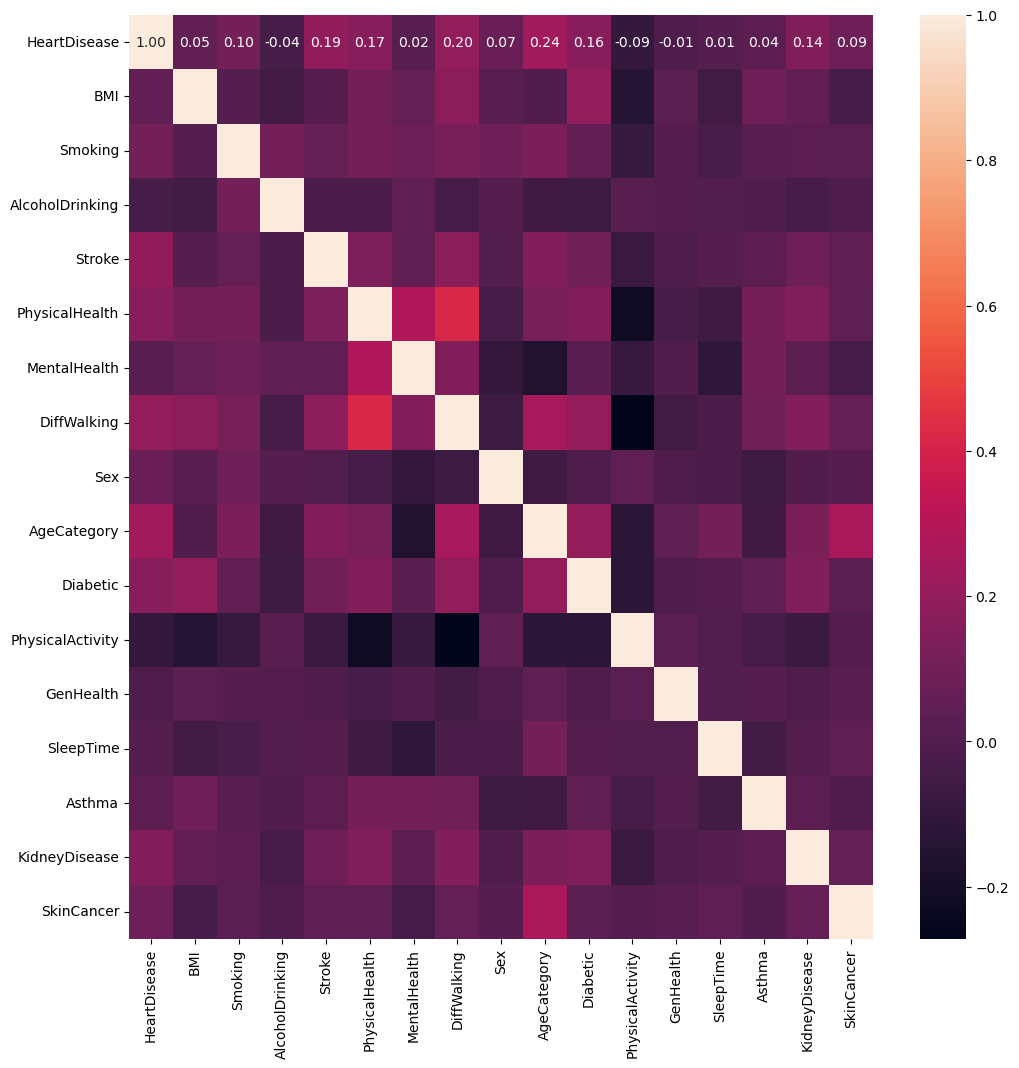

In [27]:
# correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(),fmt='.2f', annot=True)
plt.show()

# Resampling data

In [28]:
import imblearn
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [29]:
df.HeartDisease.value_counts()

HeartDisease
0    274456
1     27261
Name: count, dtype: int64

In [30]:
X = df.drop("HeartDisease", axis=1)
Y = df.HeartDisease

In [31]:
over = RandomOverSampler(random_state=42)

X_resampled, y_resampled = over.fit_resample(X, Y)
Counter(y_resampled)

Counter({0: 274456, 1: 274456})

## Split data

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Modeling

## Random Forest Classifier

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , accuracy_score , ConfusionMatrixDisplay

### using grid search

In [34]:
# Using gridSearch
grid_params = { 'max_depth':[5,10,100], 'max_features': [5,10,15]}
RFC = RandomForestClassifier()       # default max_depth=500
grid = GridSearchCV(estimator = RFC , param_grid = grid_params , cv = 5 )
grid_result = grid.fit(x_train , y_train)

In [35]:
print (f'Best: {100*grid_result.best_score_ }% using {grid_result.best_params_}')

Best: 95.37144983483155% using {'max_depth': 100, 'max_features': 10}


In [36]:
print(f"Train Score: {100*grid.score(x_train,y_train)}%")

Train Score: 99.72454601101816%


### RFC 

In [37]:
RFC.fit(x_train , y_train)

RandomForestClassifier()

In [38]:
print(f"Train Score: {100*RFC.score(x_train,y_train)}%  Test Score: {100*RFC.score(x_test,y_test)}%")

Train Score: 99.72478891577035%  Test Score: 96.44314571370273%


In [39]:
RF_pred = RFC.predict(x_test)
RF_pred

array([1, 1, 0, ..., 0, 1, 0])

In [40]:
print(classification_report(y_train,RFC.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    206020
           1       0.99      1.00      1.00    205664

    accuracy                           1.00    411684
   macro avg       1.00      1.00      1.00    411684
weighted avg       1.00      1.00      1.00    411684



In [41]:
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     68436
           1       0.93      1.00      0.97     68792

    accuracy                           0.96    137228
   macro avg       0.97      0.96      0.96    137228
weighted avg       0.97      0.96      0.96    137228



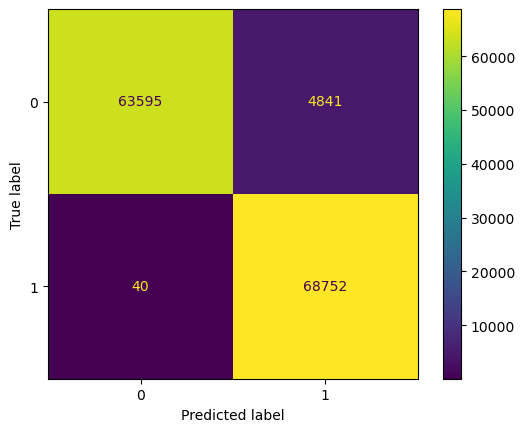

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test, RF_pred)

## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
print(f"Train Score: {100*DT.score(x_train,y_train)}%  Test Score: {100*DT.score(x_test,y_test)}%")

Train Score: 99.72478891577035%  Test Score: 95.04692919812283%


In [46]:
DT_pred = DT.predict(x_test)
DT_pred

array([1, 1, 0, ..., 0, 1, 0])

In [47]:
print(classification_report(y_train,DT.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    206020
           1       0.99      1.00      1.00    205664

    accuracy                           1.00    411684
   macro avg       1.00      1.00      1.00    411684
weighted avg       1.00      1.00      1.00    411684



In [48]:
print(classification_report(y_test,DT_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     68436
           1       0.91      1.00      0.95     68792

    accuracy                           0.95    137228
   macro avg       0.95      0.95      0.95    137228
weighted avg       0.95      0.95      0.95    137228



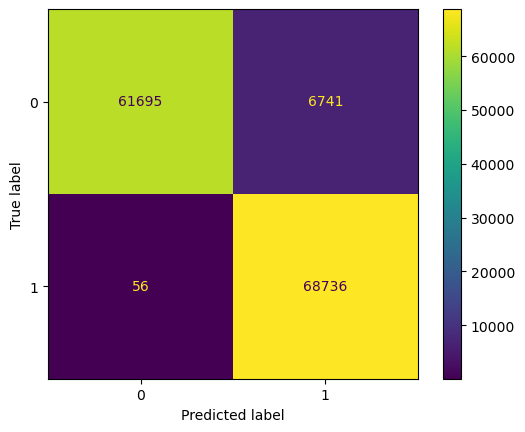

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, DT_pred)

## SVC

In [50]:
from sklearn.svm import SVC

In [51]:
svc = SVC(C=0.1)
svc.fit(x_train,y_train)

SVC(C=0.1)

In [52]:
print(f"Train Score: {100*svc.score(x_train,y_train)}% Test Score: {100*svc.score(x_test,y_test)}%")

Train Score: 74.47848349705114% Test Score: 74.417757309004%


In [53]:
SVC_pred = svc.predict(x_test)
SVC_pred

array([1, 0, 0, ..., 0, 1, 1])

In [54]:
print(classification_report(y_train,svc.predict(x_train)))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73    206020
           1       0.72      0.81      0.76    205664

    accuracy                           0.74    411684
   macro avg       0.75      0.74      0.74    411684
weighted avg       0.75      0.74      0.74    411684



In [55]:
print(classification_report(y_test,svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73     68436
           1       0.72      0.81      0.76     68792

    accuracy                           0.74    137228
   macro avg       0.75      0.74      0.74    137228
weighted avg       0.75      0.74      0.74    137228



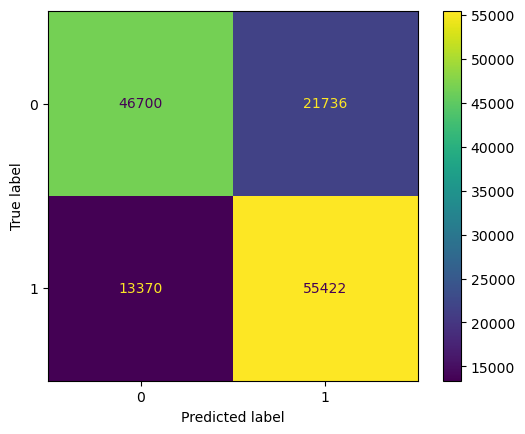

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test, SVC_pred)

## Neural Network

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,BatchNormalization,Dense,Activation
from tensorflow.keras.regularizers import L2,L1
from sklearn.model_selection import train_test_split

In [58]:
NN_model=Sequential()
# Input Layer
NN_model.add(Dense(units=30,activation='sigmoid'))

# Hidden Layers
NN_model.add(Dense(units=500,activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(units=300,activation='relu'))

# Outpput layer
NN_model.add(Dense(units=1,activation='sigmoid'))

In [59]:
# Compiling
NN_model.compile(optimizer='sgd',loss='binary_crossentropy',metrics="accuracy")

In [62]:
NN_model.fit(x=x_train,y=y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
12866/12866 [==============================] - 62s 5ms/step - loss: 0.5481 - accuracy: 0.7222 - val_loss: 0.5395 - val_accuracy: 0.7283
Epoch 2/20
12866/12866 [==============================] - 59s 5ms/step - loss: 0.5230 - accuracy: 0.7429 - val_loss: 0.5739 - val_accuracy: 0.6986
Epoch 3/20
12866/12866 [==============================] - 61s 5ms/step - loss: 0.5167 - accuracy: 0.7476 - val_loss: 0.5201 - val_accuracy: 0.7450
Epoch 4/20
12866/12866 [==============================] - 59s 5ms/step - loss: 0.5137 - accuracy: 0.7495 - val_loss: 0.5405 - val_accuracy: 0.7232
Epoch 5/20
12866/12866 [==============================] - 59s 5ms/step - loss: 0.5113 - accuracy: 0.7508 - val_loss: 0.5095 - val_accuracy: 0.7499
Epoch 6/20
12866/12866 [==============================] - 59s 5ms/step - loss: 0.5101 - accuracy: 0.7518 - val_loss: 0.5801 - val_accuracy: 0.6923
Epoch 7/20
12866/12866 [==============================] - 59s 5ms/step - loss: 0.5090 - accuracy: 0.7524 - val_loss: 0

In [63]:
test_results = NN_model.evaluate(x_test,y_test)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

4289/4289 [==============================] - 8s 2ms/step - loss: 0.5089 - accuracy: 0.7490
Test results - Loss: 0.5088577270507812 - Accuracy: 74.90308284759521%


In [64]:
NN_pred= NN_model.predict(x_test)
NN_pred

4289/4289 [==============================] - 7s 2ms/step


array([[0.77228457],
       [0.5799997 ],
       [0.02211541],
       ...,
       [0.13652217],
       [0.9052019 ],
       [0.7499426 ]], dtype=float32)

In [65]:
NN_pred = (NN_pred > 0.5).astype("int32")
NN_pred

array([[1],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [68]:
print(classification_report(y_train,(NN_model.predict(x_train)>0.5).astype('int32')))

12866/12866 [==============================] - 22s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.62      0.71    206020
           1       0.70      0.88      0.78    205664

    accuracy                           0.75    411684
   macro avg       0.77      0.75      0.75    411684
weighted avg       0.77      0.75      0.75    411684



In [69]:
print(classification_report(y_test,NN_pred))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71     68436
           1       0.70      0.88      0.78     68792

    accuracy                           0.75    137228
   macro avg       0.77      0.75      0.74    137228
weighted avg       0.77      0.75      0.74    137228



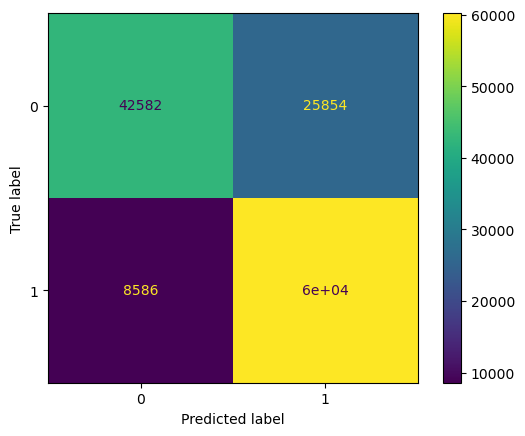

In [70]:
ConfusionMatrixDisplay.from_predictions(y_test, NN_pred)